[-0.0500434   0.52376524 -0.99770141 -0.47329335  1.45953512]
50
[4.3027806e-09]


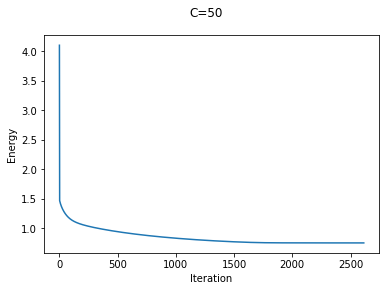

In [238]:
from sklearn.svm import LinearSVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 

iris = datasets.load_iris()

seto = iris.data[0:50] 
vers = iris.data[50:100]
virg = iris.data[100:150]

class_seto = iris.target[0:50]
class_vers = iris.target[50:100]
class_virg = iris.target[100:150]

x_org = np.concatenate((seto,vers))
target = 1*np.ones(50)
target_1 = -1*np.ones(50)
y = np.concatenate((target,target_1))
x = np.ones((100,5))
x[:,:-1] = x_org

C = 50
u = np.ones((100,1))


kappa = np.zeros((5,5))
v = np.zeros((5))

#Calculate K 
for i in range(0,100): 
    x_mu = (1/u[i])*x[i]
    mat = C*0.5*np.outer(x_mu,x[i].T)
    kappa = kappa + mat

#Calculate v
for i in range(0,100): 
    first = u[i] + 1
    second = 0.5*first / u[i]
    yx = y[i]*x[i]
    v = v + C*np.multiply(second, yx)

#initialize W 
lam = np.identity(4)
lam = np.append(lam,np.zeros([len(lam),1]),1)
val = [[0,0,0,0,0]]
lam = np.vstack([lam,val])

first = np.linalg.inv(lam + kappa)
second = v

w = np.matmul(first,second)
E_sec = 0 
for i in range(0,100): 
    prod = ((1-(y[i]*np.matmul(w.T,x[i]))+u[i])**2)/(4*u[i])
    E_sec = E_sec + prod
E = 0.5*np.matmul(np.matmul(w.T,lam),w) + C*E_sec 

y_graph = []
x_graph = []

epochs = 0 
epsilon = 10e-9
E_comp = 0 
while True:
    epochs = epochs + 1 
    E_comp = E
    for i in range(0,100):
        u[i] = abs(1 - (y[i]*np.matmul(w.T,x[i])))
        if u[i] <= epsilon: 
            u[i] = epsilon
        else: 
            continue

    kappa = np.zeros((5,5))
    v = np.zeros((5))
    
    #Calculate K 
    for i in range(0,100): 
        x_mu = (1/u[i])*x[i]
        mat = C*0.5*np.outer(x_mu,x[i].T)
        kappa = kappa + mat

    #Calculate v
    for i in range(0,100): 
        first = u[i] + 1
        second = 0.5*first / u[i]
        yx = y[i]*x[i]
        v = v + C*np.multiply(second, yx)
        
    first = np.linalg.inv(lam + kappa)
    second = v
    w = np.matmul(first,second)

    #Calculate new energy value 
    E_sec = 0 
    for i in range(0,100): 
        prod = ((1-(y[i]*np.matmul(w.T,x[i]))+u[i])**2)/(4*u[i])
        E_sec = E_sec + prod
    E = 0.5*np.matmul(np.matmul(w.T,lam),w) + C*E_sec 
    y_graph.append(E)
    x_graph.append(epochs)
    if abs(E - E_comp) < 0.0000001: 
        break
    else: 
        continue
        
plt.plot(x_graph, y_graph)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.suptitle("C=50")
print(w)

#calculate misclassification error 
misclassified = 0 
for i in range(0,100): 
    comp = y[i]*np.matmul(w.T,x[i])
    if y[i] == 1: 
        if comp < 1: 
            misclassified = misclassified + 1 
        else: 
            continue
    if y[i] == -1: 
        if comp > -1: 
            misclassified = misclassified + 1 
        else: 
            continue
        
print(misclassified)
w_norm = w[:4]
print(E_sec)
